<a href="https://colab.research.google.com/github/j0h4nM/ciencia_de_datos-/blob/main/ciencia_de_datos_medidas_centrales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#trabajando con medidads centrales
##1. como analizar dataframes
##.2. overview de los datos
##3. obtener las medias entrales
##4. analizar graficas


In [2]:
!pip install statsmodels

In [3]:
!pip install Wquantiles

##1 analizae dataframes


In [4]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
estado = pd.read_csv("/content/state.csv")

In [49]:
estado.tail(4)

,State,Population,Murder.Rate,Abbreviation
46,Washington,6724540,2.5,WA
47,West Virginia,1852994,4.0,WV
48,Wisconsin,5686986,2.9,WI
49,Wyoming,563626,2.7,WY


In [50]:
estado.columns

Index(['State', 'Population', 'Murder.Rate', 'Abbreviation'], dtype='object')

In [51]:
list(estado.columns)#convertir en listas los nombres de colunas

['State', 'Population', 'Murder.Rate', 'Abbreviation']

In [52]:
estado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Population    50 non-null     int64  
 2   Murder.Rate   50 non-null     float64
 3   Abbreviation  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


In [53]:
estado.describe()

,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


###2.1 estimando las tasas de poblaion y asesinatos

In [54]:
estado["Population"].mean()

6162876.3

In [55]:
trim_mean(estado.Population, 0.1)

4783697.125

In [56]:
#media ponderada de asesinatos
np.average(estado["Murder.Rate"],weights=estado.Population)

4.445833981123393

<Axes: >

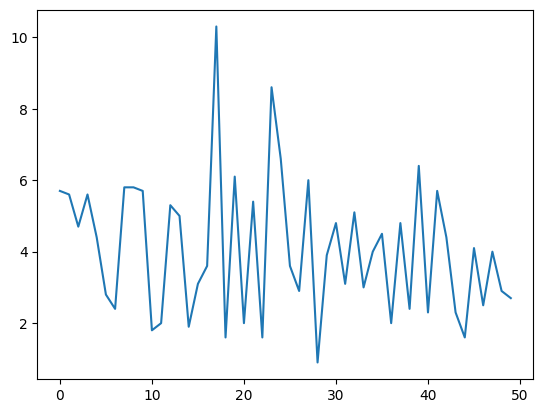

In [59]:
estado['Murder.Rate'].plot.line()

<Axes: >

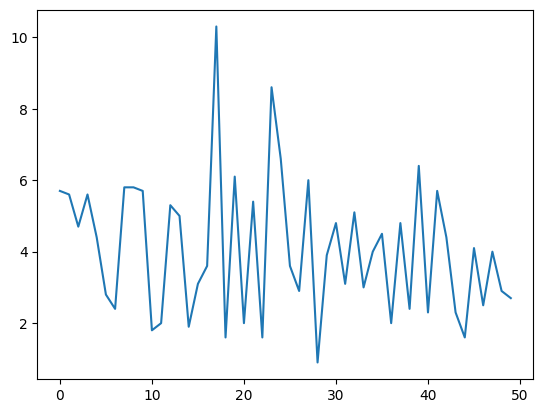

In [60]:
estado['Murder.Rate'].plot.line()

<Axes: >

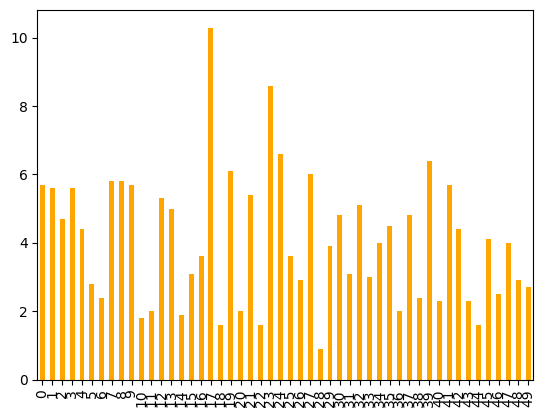

In [61]:
estado['Murder.Rate'].plot.bar(color="orange")

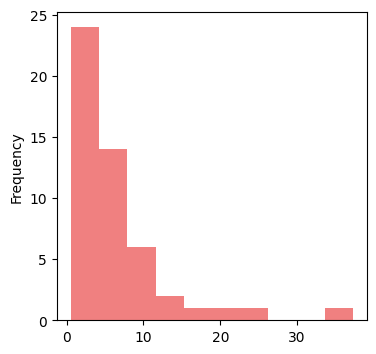

<Figure size 640x480 with 0 Axes>

In [38]:
ax=(estado.Population/1_000_000).plot.hist(figsize=(4,4),color="lightcoral")
ax.set_label("poblacion [millones]")
plt.show()
plt.tight_layout()

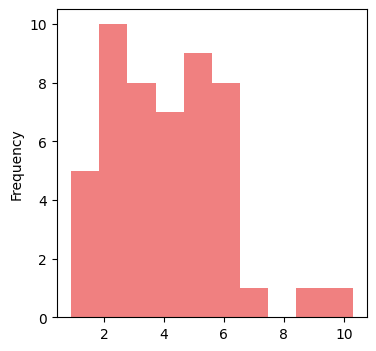

<Figure size 640x480 with 0 Axes>

In [42]:
ax=(estado["Murder.Rate"]).plot.hist(figsize=(4,4),color="lightcoral")
plt.show()
plt.tight_layout()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an 

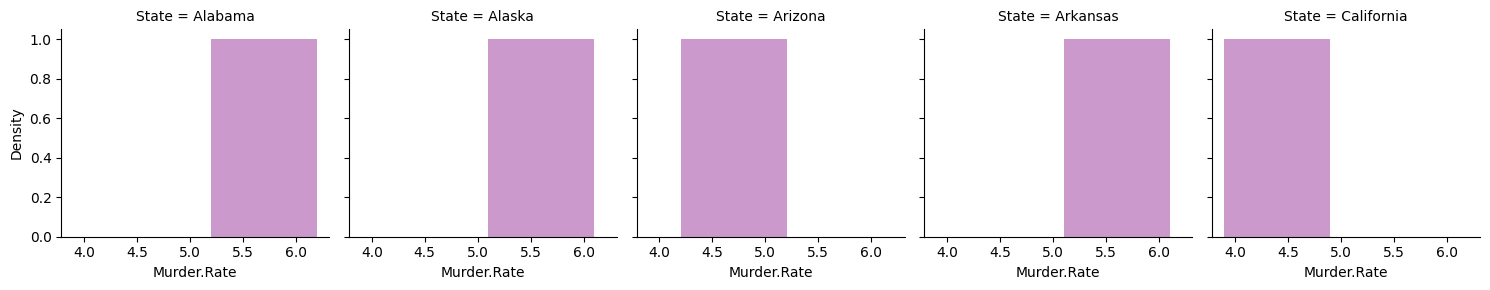

In [48]:
analisis=estado.head()
g=sns.FacetGrid(analisis,col="State")
g.map(sns.distplot,"Murder.Rate",color="purple")